In [17]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers.core import Flatten, Dense
from keras.optimizers import SGD
from keras.datasets import mnist

import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float16') / 255.
x_test = x_test.astype('float16') / 255.

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Network

In [14]:
model = Sequential([
    Convolution2D(20, kernel_size=5, padding="same", activation="relu", input_shape=(28, 28, 1,)),
    MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
    
    Flatten(),
    Dense(10, activation="softmax"),
])

# Hyper Parameters

In [15]:
sgd = SGD(lr=0.1, momentum=0.9)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

# Training

In [29]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=3, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 26s - loss: 0.1718 - acc: 0.9498 - val_loss: 0.0858 - val_acc: 0.9753
Epoch 2/3
60000/60000 [==============================] - 25s - loss: 0.0936 - acc: 0.9736 - val_loss: 0.0858 - val_acc: 0.9741
Epoch 3/3
60000/60000 [==============================] - 26s - loss: 0.0760 - acc: 0.9786 - val_loss: 0.0776 - val_acc: 0.9765


# Test

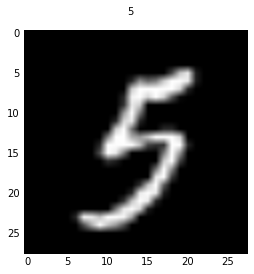

In [35]:
image = x_train[np.random.randint(0, x_train.shape[0])]
prediction = model.predict(np.array([image]))[0]

fig = plt.figure()
plt.imshow(image.reshape((28, 28)), cmap="gray")
fig.suptitle(np.argmax(prediction))